# Data exploration

In [34]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.helpers.path import DATA_PATH

In [14]:
# Set some constants for plotting
plt.rcParams["figure.figsize"] = (20, 10)

In [7]:
train_data = pd.read_csv(DATA_PATH / "train.csv", parse_dates=["start_time"])
train_data.head()

,start_time,hydro,micro,thermal,wind,river,total,y,sys_reg,flow
0,2019-01-09 14:10:00,1591.839,141.928,11.5,74.428,0.0,1819.695,341.330021,10.0,-4417.4
1,2019-01-09 14:15:00,1591.839,141.928,11.5,74.428,0.0,1819.695,330.114330,10.0,-4417.4
2,2019-01-09 14:20:00,1591.839,141.928,11.5,74.428,0.0,1819.695,323.877221,10.0,-4417.4
3,2019-01-09 14:25:00,1591.839,141.928,11.5,74.428,0.0,1819.695,296.438463,10.0,-4417.4
4,2019-01-09 14:30:00,1591.839,141.928,11.5,74.428,0.0,1819.695,269.097132,10.0,-4417.4


## Find NaNs

In [20]:
train_data.isna().sum()

start_time    0
hydro         0
micro         0
thermal       0
wind          0
river         0
total         0
y             0
sys_reg       0
flow          0
dtype: int64

No data is missing. This makes the data much easier to work with, thanks Professor!

## Look at data spread

<AxesSubplot:>

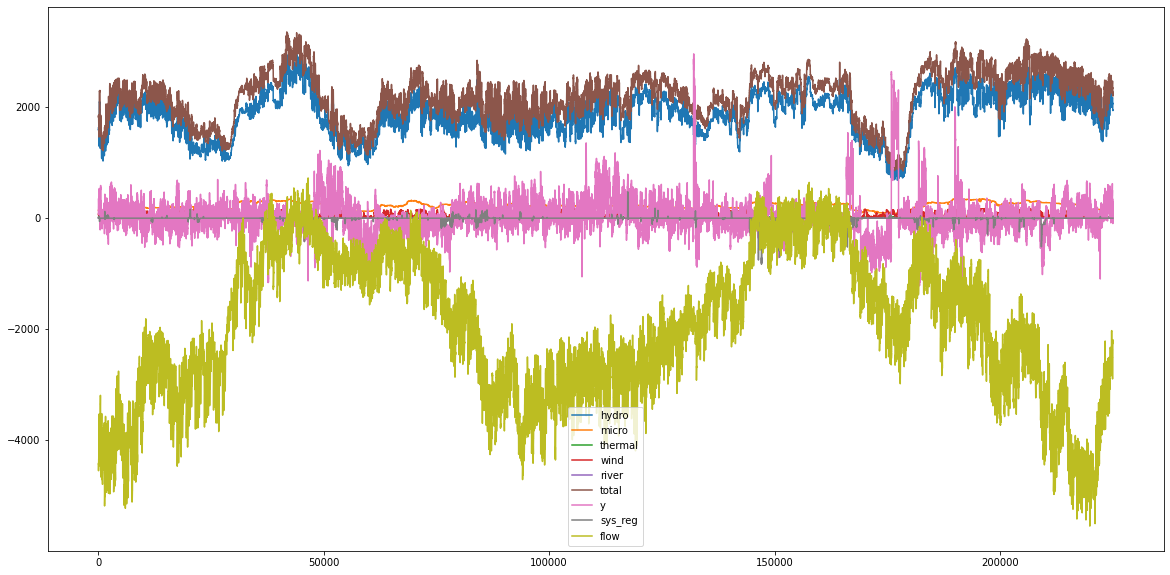

In [17]:
train_data.drop(["start_time"], axis=1).plot()

In [32]:
train_data.nunique()

start_time    225088
hydro          20328
micro          17705
thermal           80
wind           17275
river              1
total          20349
y             224386
sys_reg          677
flow           49783
dtype: int64

One interesting thing to note from this: column "river" only ever has one value, so we can safely ignore this when training data

In [43]:
train_data.describe(percentiles=[0.02, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.98])

,hydro,micro,thermal,wind,river,total,y,sys_reg,flow
count,225088.000000,225088.000000,225088.000000,225088.000000,225088.0,225088.000000,225088.000000,225088.000000,225088.000000
mean,1888.334127,224.189826,21.803497,55.703266,0.0,2190.031963,8.907921,-8.284305,-1999.055081
std,401.000305,58.559855,3.579229,47.053033,0.0,444.077730,320.262539,43.748315,1311.682286
min,683.438000,80.371000,0.000000,0.000000,0.0,849.732000,-1579.680903,-828.000000,-5541.200000
2%,1010.000000,97.317000,12.000000,0.550000,0.0,1190.292000,-639.141650,-128.000000,-4742.527000
5%,1185.040000,124.394000,12.000000,2.007000,0.0,1390.997000,-451.001161,-58.000000,-4267.000000
10%,1317.949000,146.202000,19.500000,4.824000,0.0,1554.150000,-300.513303,-10.000000,-3741.400000
25%,1625.029000,185.017000,22.100000,15.704000,0.0,1916.523000,-142.226700,0.000000,-2996.700000
50%,1933.916000,225.938000,22.100000,41.848000,0.0,2248.874000,-11.282351,0.000000,-1953.700000
75%,2175.595000,269.558000,24.100000,88.723000,0.0,2497.792000,127.454943,0.000000,-906.900000


array([[<AxesSubplot:title={'center':'start_time'}>,
        <AxesSubplot:title={'center':'hydro'}>,
        <AxesSubplot:title={'center':'micro'}>],
       [<AxesSubplot:title={'center':'thermal'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'river'}>],
       [<AxesSubplot:title={'center':'total'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'sys_reg'}>],
       [<AxesSubplot:title={'center':'flow'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

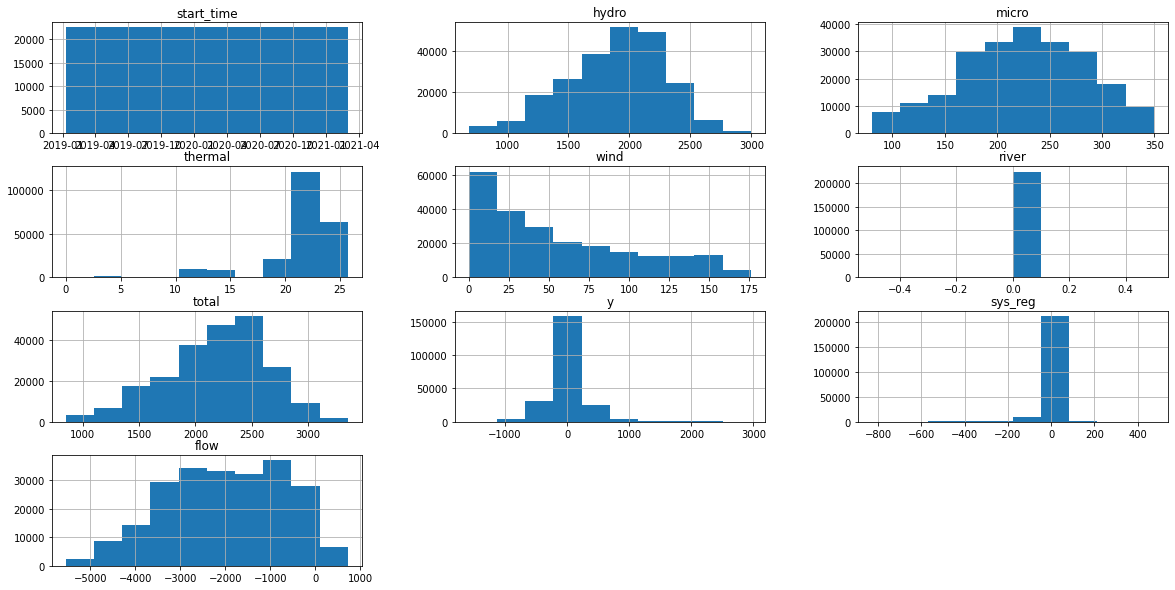

In [37]:
train_data.hist()

## Look at correlations

In [53]:
# Add prev_y as a column
train_data["prev_y"] = train_data.y.shift(1)
# Move y to last column
columns = train_data.columns.to_list()
columns.remove("y")
columns.append("y")
train_data = train_data[columns]

In [54]:
train_data.drop("river", axis=1).corr()

,hydro,micro,thermal,wind,total,sys_reg,flow,prev_y,y
hydro,1.000000,0.706722,0.123953,-0.084568,0.988229,-0.194332,0.055049,-0.043757,-0.043008
micro,0.706722,1.000000,0.208816,0.049387,0.776950,-0.123761,0.257711,-0.025720,-0.025654
thermal,0.123953,0.208816,1.000000,0.095658,0.157660,-0.015615,-0.132554,0.097081,0.097176
wind,-0.084568,0.049387,0.095658,1.000000,0.036876,0.112890,-0.091709,0.069668,0.069486
total,0.988229,0.776950,0.157660,0.036876,1.000000,-0.179965,0.072907,-0.034739,-0.034073
sys_reg,-0.194332,-0.123761,-0.015615,0.112890,-0.179965,1.000000,-0.194806,0.115808,0.116042
flow,0.055049,0.257711,-0.132554,-0.091709,0.072907,-0.194806,1.000000,-0.172694,-0.172829
prev_y,-0.043757,-0.025720,0.097081,0.069668,-0.034739,0.115808,-0.172694,1.000000,0.992169
y,-0.043008,-0.025654,0.097176,0.069486,-0.034073,0.116042,-0.172829,0.992169,1.000000


<AxesSubplot:>

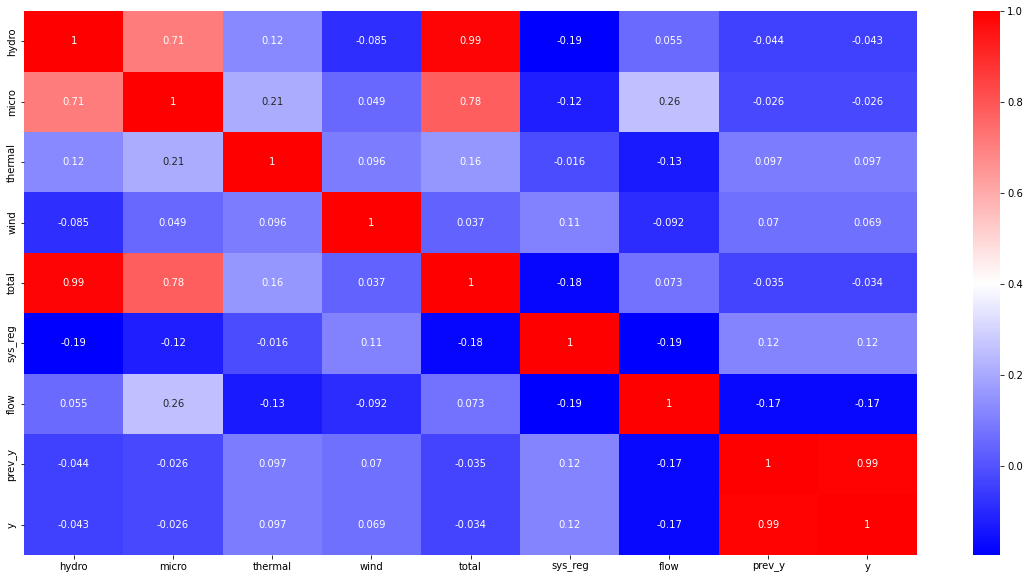

In [55]:
sns.heatmap(
    train_data.drop("river", axis=1).corr(),
    cmap="bwr",
    annot=True
)

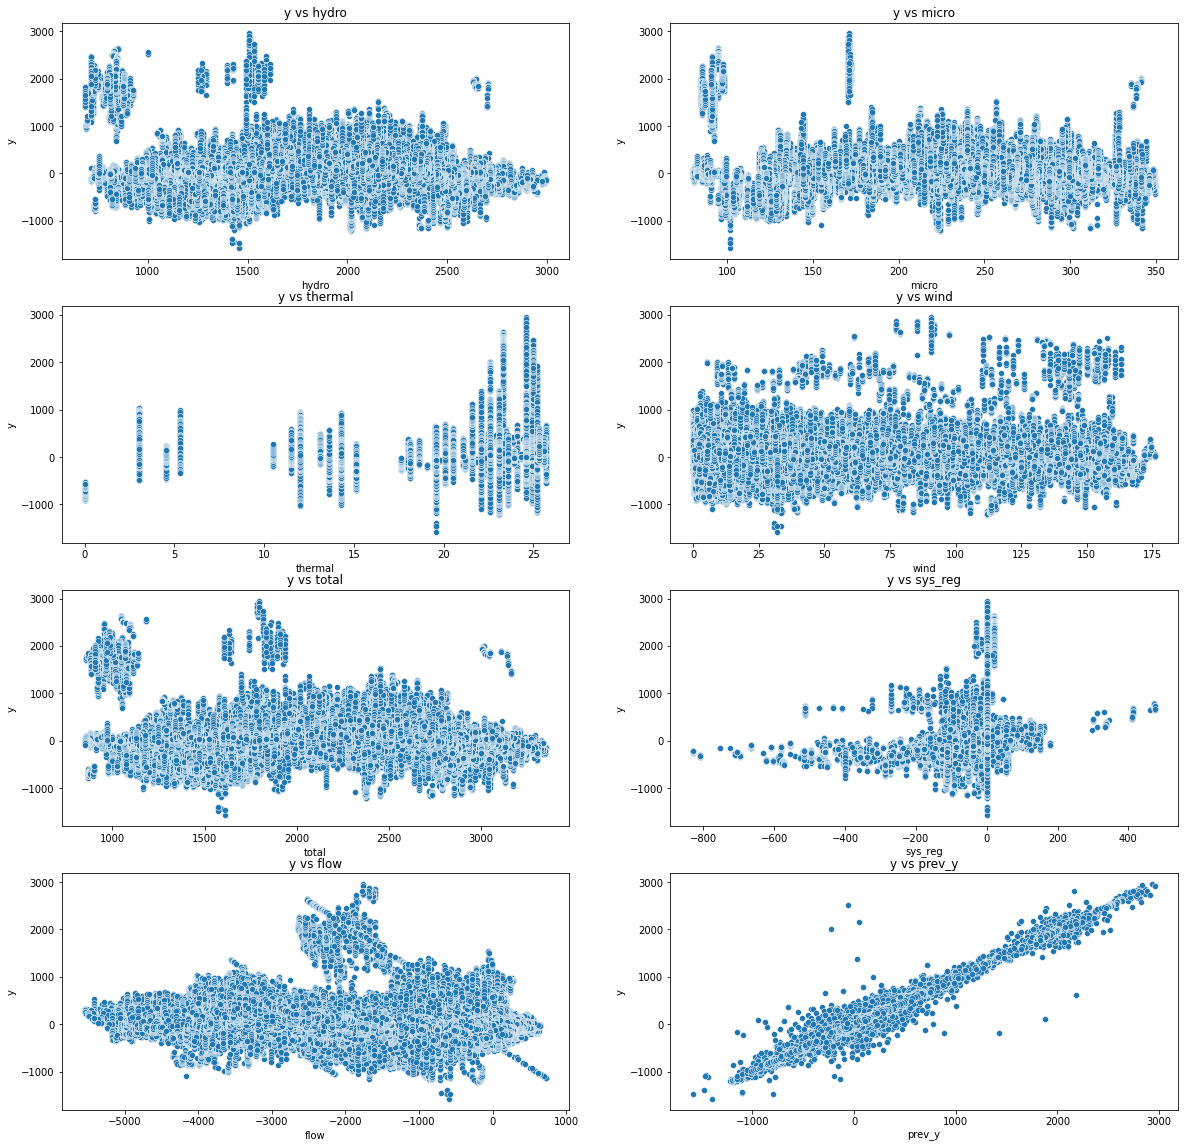

In [57]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
ax = axes.flat

for i, col in enumerate(train_data.drop(["y", "river", "start_time"], axis=1).columns):
    sns.scatterplot(x=col, y="y", data=train_data[[col, "y"]], ax=ax[i])
    ax[i].set_title(f"y vs {col}")
